In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Healthcare Providers.csv")

In [3]:
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758
5,3443985,1346571551,PUGH,JOHN,R,DPT,M,I,504 ALBEMARLE SQ,NaN,...,97016,Application of blood vessel compression or dec...,N,192,36,192,13.550989583,63.1125,9.6764583333,10.506927083
6,2137027,1215943535,BRUMITT,TOM,B,DO,M,I,70 DOCTORS PARK,NaN,...,20610,Aspiration and/or injection of large joint or ...,N,21,19,21,45.971904762,164.57142857,36.036190476,37.77952381
7,6169160,1629160551,GALBREATH,RONALD,G,M.D.,M,I,12522 E. LAMBERT ROAD,SUITE D,...,G0008,Administration of influenza virus vaccine,N,52,50,52,29.33,50,28.74,25.32
8,5086226,1518929124,BOONE,RALPH,M,D.O.,M,I,1215 DUNN AVE,NaN,...,80061,"Blood test, lipids (cholesterol and triglyceri...",N,73,68,73,15.510410959,76,15.197945205,15.197945205
9,3900718,1396781134,METWEST INC,NaN,NaN,NaN,NaN,O,695 S BROADWAY,NaN,...,84392,Urine sulfate (acid) level,N,19,16,19,6.51,29.65,6.38,6.38


In [4]:
print("Shape of the Dataset:")
df.shape

Shape of the Dataset:


(100000, 27)

In [5]:
print("\nDataset information")
df.info()


Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-nul

## These Five Columns Have NULL Values
* 3   First Name of the Provider                                95745 non-null   object 
* 4   Middle Initial of the Provider                            70669 non-null   object 
* 5   Credentials of the Provider                               92791 non-null   object 
* 6   Gender of the Provider                                    95746 non-null   object 
* 9   Street Address 2 of the Provider                          40637 non-null   object

In [7]:
print("\nStatistical summary of the dataset:")
print(df.describe(include='all'))


Statistical summary of the dataset:
               index  National Provider Identifier  \
count   1.000000e+05                  1.000000e+05   
unique           NaN                           NaN   
top              NaN                           NaN   
freq             NaN                           NaN   
mean    4.907646e+06                  1.498227e+09   
std     2.839633e+06                  2.874125e+08   
min     2.090000e+02                  1.003001e+09   
25%     2.458791e+06                  1.245669e+09   
50%     4.901266e+06                  1.497847e+09   
75%     7.349450e+06                  1.740374e+09   
max     9.847440e+06                  1.993000e+09   

       Last Name/Organization Name of the Provider First Name of the Provider  \
count                                       100000                      95745   
unique                                       42820                      13022   
top                                          PATEL                    M

In [8]:
print("\nMissing values and their percentages:")
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages
})
print(missing_data)


Missing values and their percentages:
                                                    Missing Values  Percentage
index                                                            0       0.000
National Provider Identifier                                     0       0.000
Last Name/Organization Name of the Provider                      0       0.000
First Name of the Provider                                    4255       4.255
Middle Initial of the Provider                               29331      29.331
Credentials of the Provider                                   7209       7.209
Gender of the Provider                                        4254       4.254
Entity Type of the Provider                                      0       0.000
Street Address 1 of the Provider                                 0       0.000
Street Address 2 of the Provider                             59363      59.363
City of the Provider                                             0       0.000
Zip Code of t

In [9]:
cleaned_df = df.dropna(thresh=len(df) * 0.5, axis=1)
print("Shape after removing columns with more than 50% missing values:")
print(cleaned_df.shape)

Shape after removing columns with more than 50% missing values:
(100000, 26)


## Column - Street Address 2 of the Provider have Null Values more than 50% so that column is dropped

In [11]:
numerical_columns = cleaned_df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:")
print(numerical_columns)

categorical_columns = cleaned_df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
Index(['index', 'National Provider Identifier', 'Zip Code of the Provider'], dtype='object')

Categorical Columns:
Index(['Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider',
       'Credentials of the Provider', 'Gender of the Provider',
       'Entity Type of the Provider', 'Street Address 1 of the Provider',
       'City of the Provider', 'State Code of the Provider',
       'Country Code of the Provider', 'Provider Type',
       'Medicare Participation Indicator', 'Place of Service', 'HCPCS Code',
       'HCPCS Description', 'HCPCS Drug Indicator', 'Number of Services',
       'Number of Medicare Beneficiaries',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount'],
      dtype='object')


In [12]:
# List of categorical columns to fill with mode
categorical_columns = [
    'First Name of the Provider',
    'Middle Initial of the Provider',
    'Credentials of the Provider',
    'Gender of the Provider'
]

# Fill missing values for each column
for column in categorical_columns:
    cleaned_df[column].fillna(cleaned_df[column].mode()[0], inplace=True)

In [13]:
print("\nMissing values after imputation:")
print(cleaned_df.isnull().sum())



Missing values after imputation:
index                                                       0
National Provider Identifier                                0
Last Name/Organization Name of the Provider                 0
First Name of the Provider                                  0
Middle Initial of the Provider                              0
Credentials of the Provider                                 0
Gender of the Provider                                      0
Entity Type of the Provider                                 0
Street Address 1 of the Provider                            0
City of the Provider                                        0
Zip Code of the Provider                                    0
State Code of the Provider                                  0
Country Code of the Provider                                0
Provider Type                                               0
Medicare Participation Indicator                            0
Place of Service                    

## Preprocessing

In [15]:
DropCols = ['index', 'National Provider Identifier',
            'Last Name/Organization Name of the Provider',
            'First Name of the Provider', 'Middle Initial of the Provider',
            'Street Address 1 of the Provider', 'Zip Code of the Provider', 
            "HCPCS Code"]
cleaned_df = cleaned_df.drop(columns=DropCols)



In [16]:
cleaned_df.head()

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,M.D.,F,I,SAINT LOUIS,MO,US,Internal Medicine,Y,F,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,M.D.,F,I,FAYETTEVILLE,NC,US,Obstetrics & Gynecology,Y,O,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,DPM,M,I,NORTH HAVEN,CT,US,Podiatry,Y,O,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,MD,M,I,KANSAS CITY,MO,US,Internal Medicine,Y,O,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,DO,M,I,JUPITER,FL,US,Internal Medicine,Y,O,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [17]:
# List of columns to convert
columns_to_convert = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

# Convert columns to numeric, setting invalid parsing to NaN
for column in columns_to_convert:
    cleaned_df[column] = pd.to_numeric(cleaned_df[column], errors='coerce')

# Display info to verify the changes
print(cleaned_df[columns_to_convert].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Number of Services                                        97347 non-null  float64
 1   Number of Medicare Beneficiaries                          99595 non-null  float64
 2   Number of Distinct Medicare Beneficiary/Per Day Services  98500 non-null  float64
 3   Average Medicare Allowed Amount                           99255 non-null  float64
 4   Average Submitted Charge Amount                           93277 non-null  float64
 5   Average Medicare Payment Amount                           99534 non-null  float64
 6   Average Medicare Standardized Amount                      99530 non-null  float64
dtypes: float64(7)
memory usage: 5.3 MB
None


In [18]:
 cleaned_df

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,M.D.,F,I,SAINT LOUIS,MO,US,Internal Medicine,Y,F,"Initial hospital inpatient care, typically 70 ...",N,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,M.D.,F,I,FAYETTEVILLE,NC,US,Obstetrics & Gynecology,Y,O,"Screening mammography, bilateral (2-view study...",N,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,DPM,M,I,NORTH HAVEN,CT,US,Podiatry,Y,O,"Established patient home visit, typically 25 m...",N,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,MD,M,I,KANSAS CITY,MO,US,Internal Medicine,Y,O,"Urinalysis, manual test",N,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,DO,M,I,JUPITER,FL,US,Internal Medicine,Y,O,Injection beneath the skin or into muscle for ...,N,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,PT,F,I,WILMINGTON,IL,US,Physical Therapist in Private Practice,Y,O,"Evaluation of physical therapy, typically 30 m...",N,20.0,20.0,20.0,85.372500,214.000000,60.725500,62.248500
99996,ARNP,F,I,REDMOND,OR,US,Nurse Practitioner,Y,O,Established patient office or other outpatient...,N,136.0,107.0,136.0,61.270000,144.051471,30.006176,37.040221
99997,M.D.,M,I,SAINT LOUIS,MO,US,Cardiology,Y,F,"Doppler ultrasound study of heart blood flow, ...",N,11.0,11.0,11.0,17.980000,109.545455,14.090000,14.620000
99998,MD,F,I,LARCHMONT,NY,US,Internal Medicine,Y,O,Administration of influenza virus vaccine,N,12.0,12.0,12.0,30.540000,65.000000,29.930000,25.320000


In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline

In [20]:
import pandas as pd

# Assuming 'cleaned_df' is your DataFrame and 'target_column' is your target variable
nominal_columns = ['Credentials of the Provider','Gender of the Provider','Entity Type of the Provider','City of the Provider','State Code of the Provider',
           'Country Code of the Provider','Provider Type','Medicare Participation Indicator','Place of Service','HCPCS Description','HCPCS Drug Indicator']  # Replace with actual nominal columns

# Check unique values in each nominal column
for col in nominal_columns:
    unique_count = cleaned_df[col].nunique()
    print(f"Column '{col}' has {unique_count} unique values.")
    
    if unique_count > 10:
        print(f"Applying frequency encoding to column: {col}")
        # Apply Frequency Encoding
        freq_map = cleaned_df[col].value_counts().to_dict()
        cleaned_df[col] = cleaned_df[col].map(freq_map)
    else:
        print(f"Applying one-hot encoding to column: {col}")
        # Apply One-Hot Encoding for low-cardinality columns
        one_hot = pd.get_dummies(cleaned_df[col], prefix=col)
        cleaned_df = pd.concat([cleaned_df, one_hot], axis=1)
        cleaned_df.drop(columns=[col], inplace=True)

# Display the updated DataFrame
print(cleaned_df.info())


Column 'Credentials of the Provider' has 1854 unique values.
Applying frequency encoding to column: Credentials of the Provider
Column 'Gender of the Provider' has 2 unique values.
Applying one-hot encoding to column: Gender of the Provider
Column 'Entity Type of the Provider' has 2 unique values.
Applying one-hot encoding to column: Entity Type of the Provider
Column 'City of the Provider' has 5846 unique values.
Applying frequency encoding to column: City of the Provider
Column 'State Code of the Provider' has 58 unique values.
Applying frequency encoding to column: State Code of the Provider
Column 'Country Code of the Provider' has 4 unique values.
Applying one-hot encoding to column: Country Code of the Provider
Column 'Provider Type' has 90 unique values.
Applying frequency encoding to column: Provider Type
Column 'Medicare Participation Indicator' has 2 unique values.
Applying one-hot encoding to column: Medicare Participation Indicator
Column 'Place of Service' has 2 unique val

In [21]:
# Convert all boolean columns to integers
boolean_columns = cleaned_df.select_dtypes(include=['bool']).columns
cleaned_df[boolean_columns] = cleaned_df[boolean_columns].astype(float)


In [22]:
cleaned_df

,Credentials of the Provider,City of the Provider,State Code of the Provider,Provider Type,HCPCS Description,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,...,Country Code of the Provider_DE,Country Code of the Provider_JP,Country Code of the Provider_TR,Country Code of the Provider_US,Medicare Participation Indicator_N,Medicare Participation Indicator_Y,Place of Service_F,Place of Service_O,HCPCS Drug Indicator_N,HCPCS Drug Indicator_Y
0,32757,500,1997,11366,1297,27.0,24.0,27.0,200.587778,305.211111,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,32757,209,3725,1028,243,175.0,175.0,175.0,123.730000,548.800000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1330,10,1403,2027,44,32.0,13.0,32.0,90.650000,155.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,40083,317,1997,11366,460,20.0,18.0,20.0,3.500000,5.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,2478,51,7263,11366,732,33.0,24.0,31.0,26.520000,40.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,800,323,4073,2780,330,20.0,20.0,20.0,85.372500,214.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
99996,463,14,1046,5713,4578,136.0,107.0,136.0,61.270000,144.051471,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
99997,32757,500,1997,4602,75,11.0,11.0,11.0,17.980000,109.545455,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
99998,40083,6,6361,11366,1444,12.0,12.0,12.0,30.540000,65.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [23]:
cleaned_df.fillna(cleaned_df.mean(), inplace=True)

In [24]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   Credentials of the Provider                               100000 non-null  int64  
 1   City of the Provider                                      100000 non-null  int64  
 2   State Code of the Provider                                100000 non-null  int64  
 3   Provider Type                                             100000 non-null  int64  
 4   HCPCS Description                                         100000 non-null  int64  
 5   Number of Services                                        100000 non-null  float64
 6   Number of Medicare Beneficiaries                          100000 non-null  float64
 7   Number of Distinct Medicare Beneficiary/Per Day Services  100000 non-null  float64
 8   Avera

In [25]:
min_max_f=['Number of Services','Number of Medicare Beneficiaries','Number of Distinct Medicare Beneficiary/Per Day Services']
Standard_f=['Average Medicare Allowed Amount','Average Submitted Charge Amount','Average Medicare Payment Amount','Average Medicare Standardized Amount']


In [26]:
min_max_transform=make_pipeline(MinMaxScaler())
Standard_transform=make_pipeline(StandardScaler())

In [27]:
preprocessor=ColumnTransformer(transformers=[
    ('min max',min_max_transform,min_max_f),
    ('standard',Standard_transform,Standard_f)
],remainder='passthrough',verbose_feature_names_out=False,force_int_remainder_cols=False)

In [28]:
preprocessor.set_output(transform='pandas')

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('min max',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['Number of Services',
                                  'Number of Medicare Beneficiaries',
                                  'Number of Distinct Medicare Beneficiary/Per '
                                  'Day Services']),
                                ('standard',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Average Medicare Allowed Amount',
                                  'Average Submitted Charge Amount',
                                  'Average Medicare Payment Amount',
                                  'Average Medicare Standardized Amount'])],
                  verbose_feature_names_out=False)

In [29]:
transformed_df=preprocessor.fit_transform(cleaned_df)

In [30]:
transformed_df

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Credentials of the Provider,City of the Provider,State Code of the Provider,...,Country Code of the Provider_DE,Country Code of the Provider_JP,Country Code of the Provider_TR,Country Code of the Provider_US,Medicare Participation Indicator_N,Medicare Participation Indicator_Y,Place of Service_F,Place of Service_O,HCPCS Drug Indicator_N,HCPCS Drug Indicator_Y
0,0.016194,0.013158,0.016194,1.098226,0.621012,0.972452,1.003321,32757,500,1997,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.165992,0.165992,0.165992,0.352134,1.940981,0.549955,0.722789,32757,209,3725,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.021255,0.002024,0.021255,0.031012,-0.192958,-0.047975,-0.096209,1330,10,1403,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.009109,0.007085,0.009109,-0.814992,-1.005784,-0.718674,-0.722804,40083,317,1997,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.022267,0.013158,0.020243,-0.591527,-0.816125,-0.541578,-0.551510,2478,51,7263,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.009109,0.009109,0.009109,-0.020219,0.126753,-0.088807,-0.078095,800,323,4073,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
99996,0.126518,0.097166,0.126518,-0.254193,-0.252286,-0.426514,-0.354403,463,14,1046,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
99997,0.000000,0.000000,0.000000,-0.674428,-0.439269,-0.601485,-0.600151,32757,500,1997,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
99998,0.001012,0.001012,0.001012,-0.552503,-0.680654,-0.427351,-0.482868,40083,6,6361,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


## Isolation Forest for Anomaly Detection

In [32]:
from sklearn.ensemble import IsolationForest

# Define the selected columns for anomaly detection
selected_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

# Subset the transformed DataFrame with selected columns
df = transformed_df[selected_columns]

# Shuffle the data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Initialize the Isolation Forest model
model = IsolationForest(random_state=42, contamination='auto')

# Fit the model on the data
model.fit(df)

# Predict anomalies
df['anomaly'] = model.predict(df)

# Calculate anomaly statistics
counts = df['anomaly'].value_counts()
total = counts.sum()
anomaly_pct = (counts.get(-1, 0) / total) * 100

# Print the anomaly statistics
print(f"Total Points: {total}")
print(f"Anomalies: {counts.get(-1, 0)}")
print(f"Anomaly Percentage: {anomaly_pct:.2f}%")



Total Points: 100000
Anomalies: 12738
Anomaly Percentage: 12.74%


In [33]:
# Separate anomalies and normal points
anomaly_df = df.loc[df['anomaly'] == -1]
normal_df = df.loc[df['anomaly'] == 1]

# Display the anomalies
print("Anomaly DataFrame:")
anomaly_df


Anomaly DataFrame:


,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,anomaly
17,0.563765,0.202429,0.563765,0.138279,-4.764550e-01,-0.016190,0.042787,-1
24,0.505061,0.398785,0.505061,-0.320484,-4.909943e-01,-0.331659,-0.306241,-1
28,0.147773,0.136640,0.147773,0.353412,2.668189e+00,0.279177,0.189403,-1
48,0.015182,0.015182,0.015182,0.000000,1.540127e-16,9.192580,8.902638,-1
72,0.341093,0.234818,0.341093,-0.510285,3.922765e-01,-0.455627,-0.447105,-1
...,...,...,...,...,...,...,...,...
99965,0.444332,0.255061,0.444332,0.140317,-8.300385e-02,0.039650,0.110980,-1
99970,0.616397,0.052632,0.468623,-0.606151,-8.647858e-01,-0.540906,-0.542930,-1
99983,0.393725,0.022267,0.393725,-0.736379,-9.399842e-01,-0.660472,-0.672785,-1
99990,0.090663,0.744939,0.085866,0.150455,-2.928842e-01,0.104762,0.025698,-1


In [34]:
normal_df.head(10)

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,anomaly
0,0.136640,0.094130,0.136640,0.091586,-0.252565,-0.147307,-0.033927,1
1,0.007085,0.007085,0.007085,0.469205,0.619868,0.413967,0.433142,1
2,0.073887,0.065789,0.073887,0.099934,-0.042005,0.086147,0.062661,1
3,0.011134,0.011134,0.011134,1.000635,0.267643,1.296361,1.286306,1
4,0.003036,0.001012,0.003036,-0.638316,-0.789030,-0.569385,-0.562993,1
5,0.171053,0.029352,0.171053,-0.760339,-0.870313,-0.683169,-0.687569,1
6,0.011134,0.008097,0.011134,-0.541048,-0.434343,-0.488474,-0.476620,1
7,0.057692,0.057692,0.057692,0.195944,0.124841,0.080062,0.098853,1
8,0.008097,0.008097,0.008097,0.725094,0.511491,0.581014,0.607589,1
9,0.090663,0.058936,0.085866,-0.760339,-0.940758,-0.680169,-0.682557,1


(array([6.0489e+04, 1.4026e+04, 5.7800e+03, 3.4520e+03, 1.8790e+03,
        1.0090e+03, 4.5700e+02, 1.2000e+02, 4.2000e+01, 8.0000e+00]),
 array([0.        , 0.06072874, 0.12145749, 0.18218623, 0.24291498,
        0.30364372, 0.36437247, 0.42510121, 0.48582996, 0.5465587 ,
        0.60728745]),
 <BarContainer object of 10 artists>)

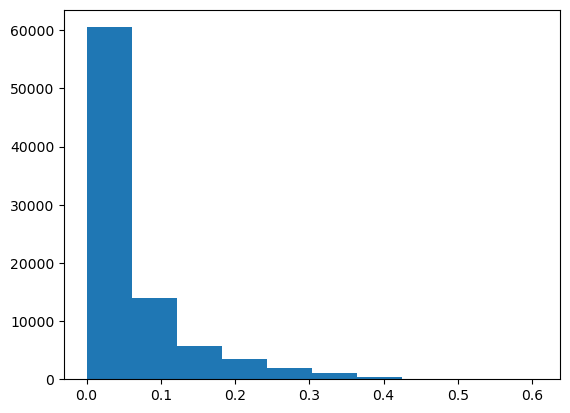

In [35]:
import matplotlib.pyplot as plt
plt.hist(normal_df['Number of Services'])

(array([4952.,  797.,  809., 1320., 1392., 1074.,  914.,  604.,  497.,
         379.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

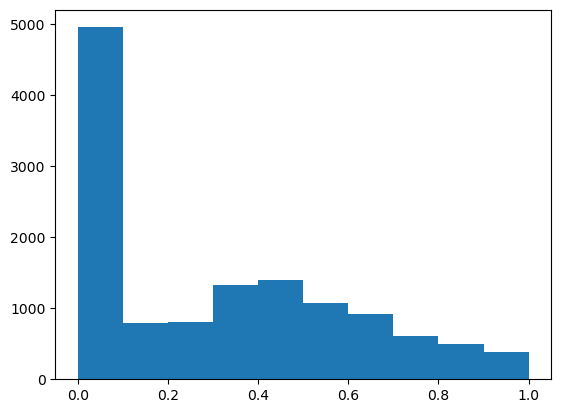

In [36]:
plt.hist(anomaly_df['Number of Services'])

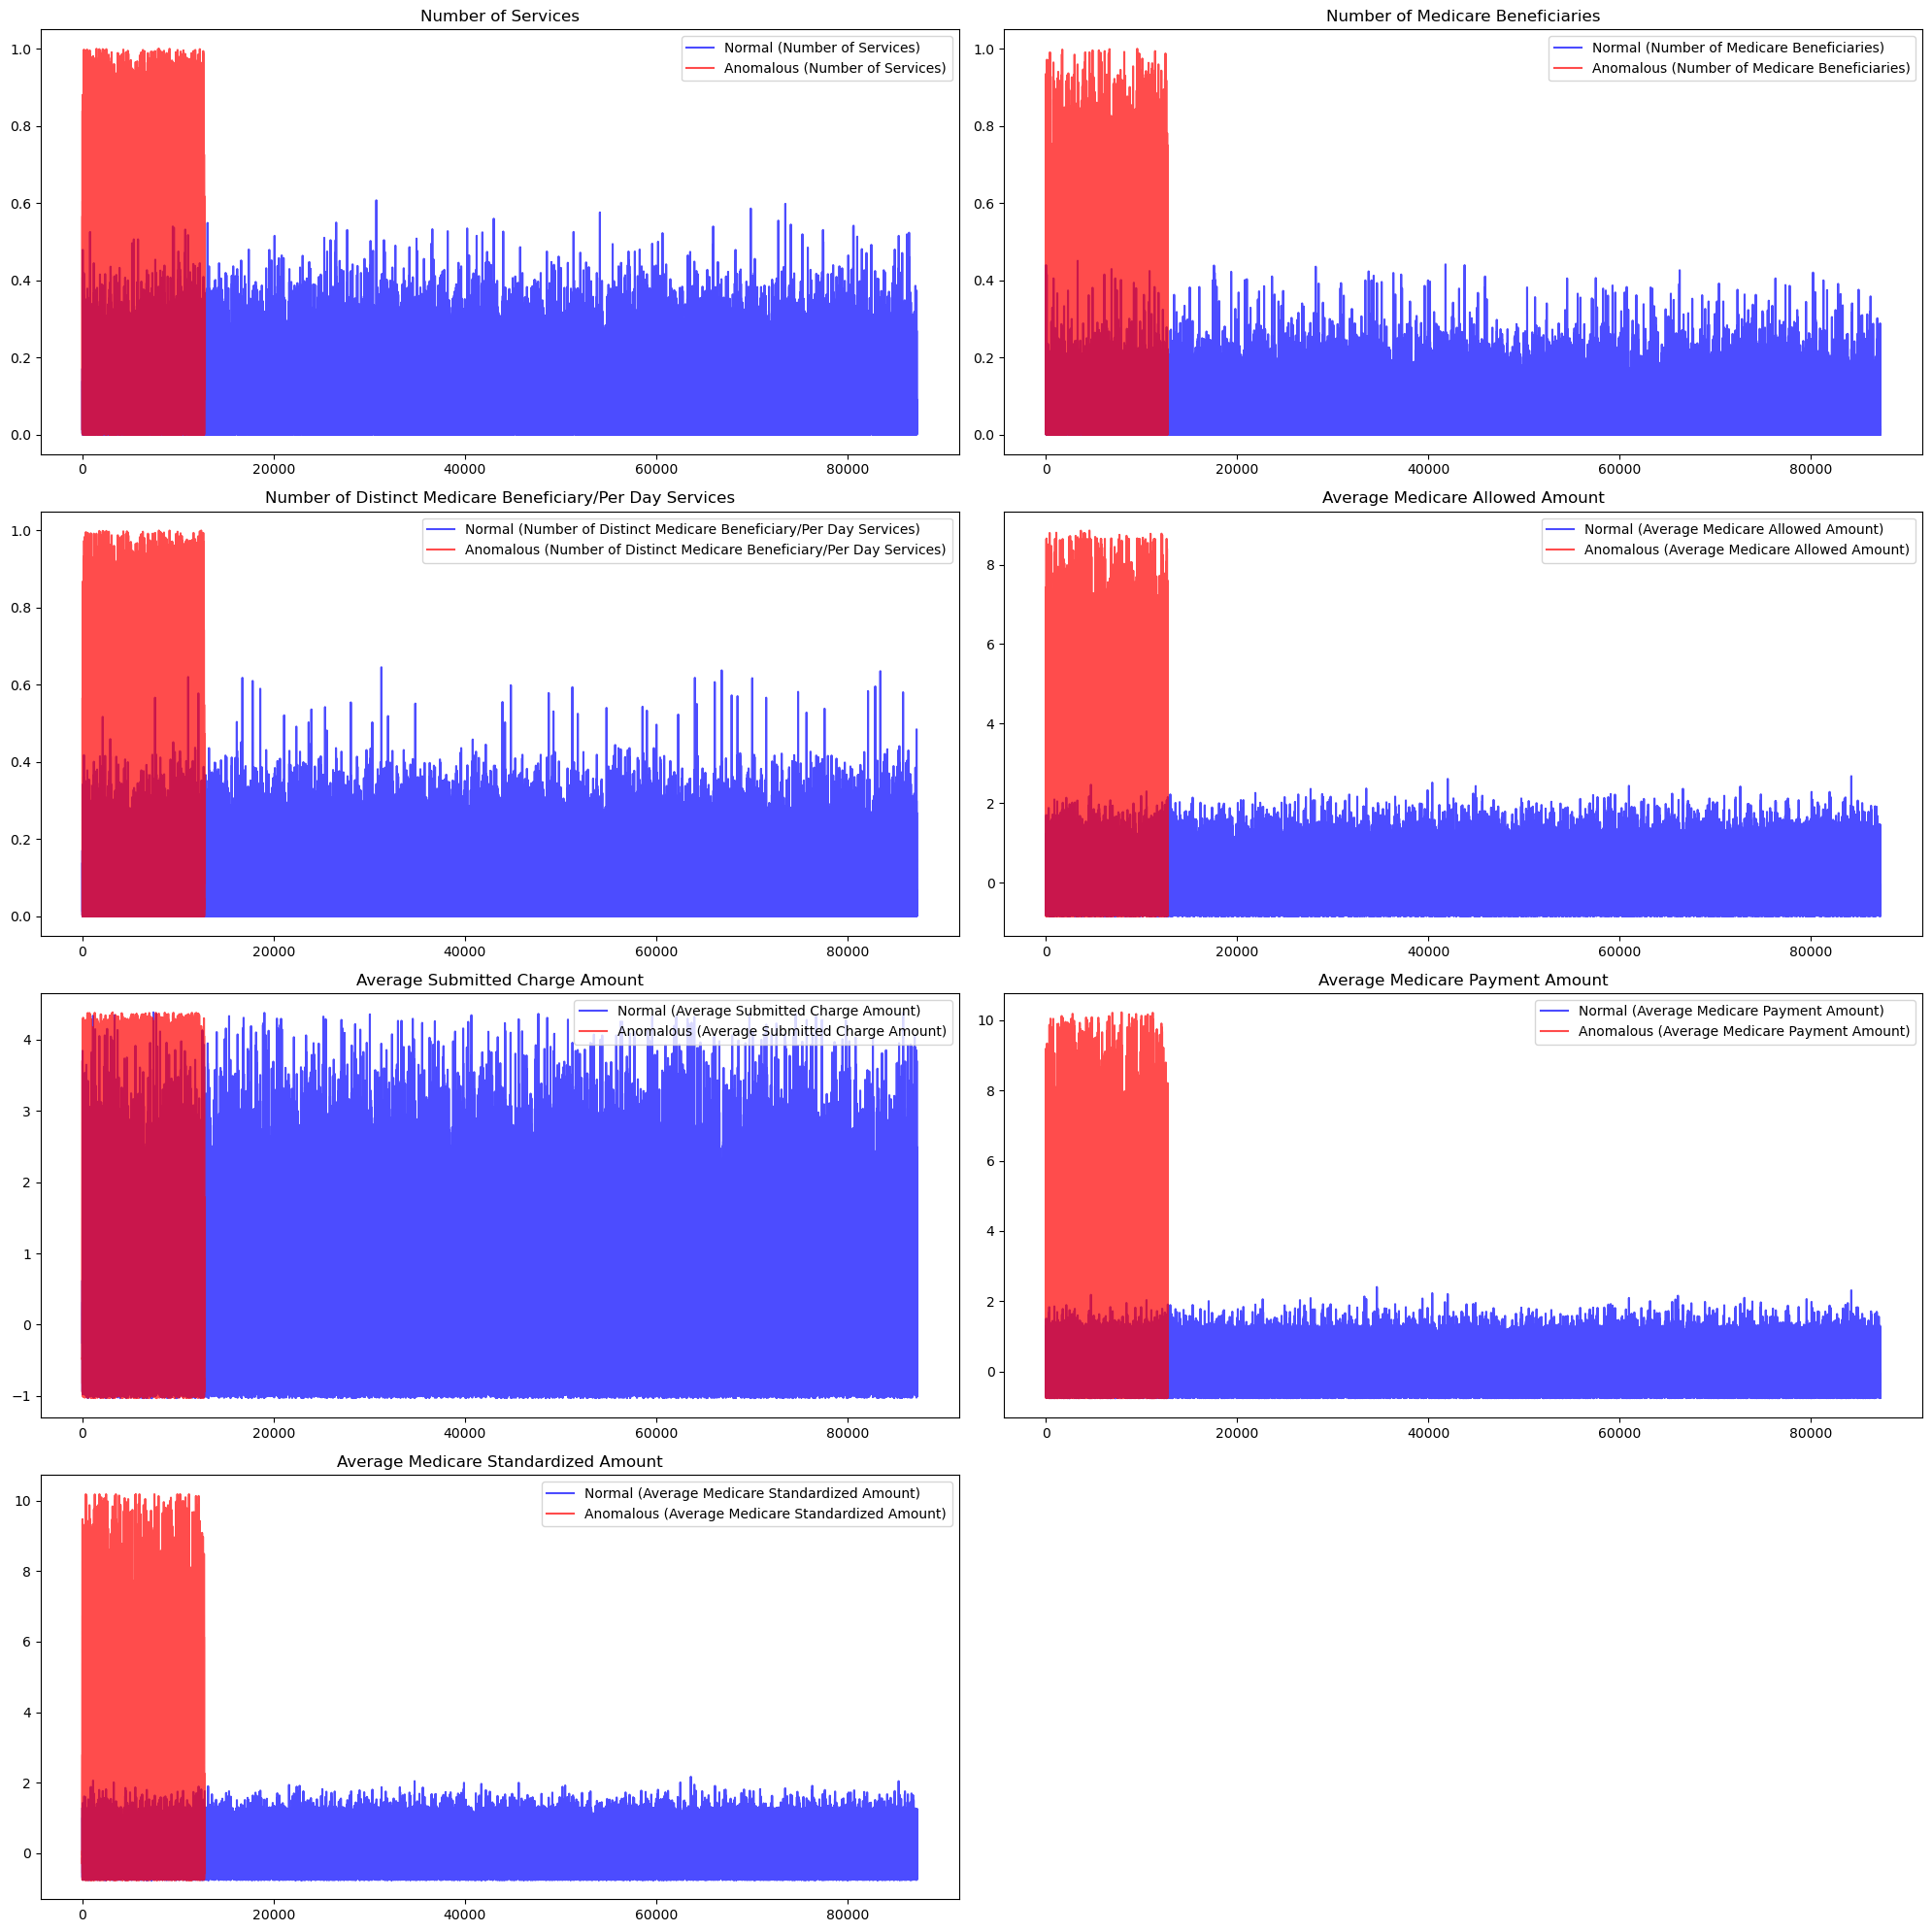

In [37]:
# Define the columns to be plotted
columns_to_plot = ['Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount']

import math

# Dynamically determine the grid size
num_columns = len(columns_to_plot)
rows = math.ceil(num_columns / 2)  # 2 subplots per row
cols = 2  # Fixed at 2 columns per row

plt.figure(figsize=(20, rows * 5))

# Loop through each column and plot
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(rows, cols, i)  # Adjust subplot grid dynamically
    plt.plot(normal_df[col].reset_index(drop=True), label=f'Normal ({col})', alpha=0.7, color='blue')
    plt.plot(anomaly_df[col].reset_index(drop=True), label=f'Anomalous ({col})', alpha=0.7, color='red')
    plt.title(col)
    plt.legend()
    plt.tight_layout()

plt.show()


In [38]:
!pip install umap-learn


In [39]:
import umap.umap_ as umap
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.manifold import TSNE

In [40]:
# Select columns for dimensionality reduction (make sure to exclude 'anomaly' column)
columns_to_use = [
    'Number of Services', 'Number of Medicare Beneficiaries', 
    'Number of Distinct Medicare Beneficiary/Per Day Services', 'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount', 'Average Medicare Payment Amount', 
    'Average Medicare Standardized Amount'
]

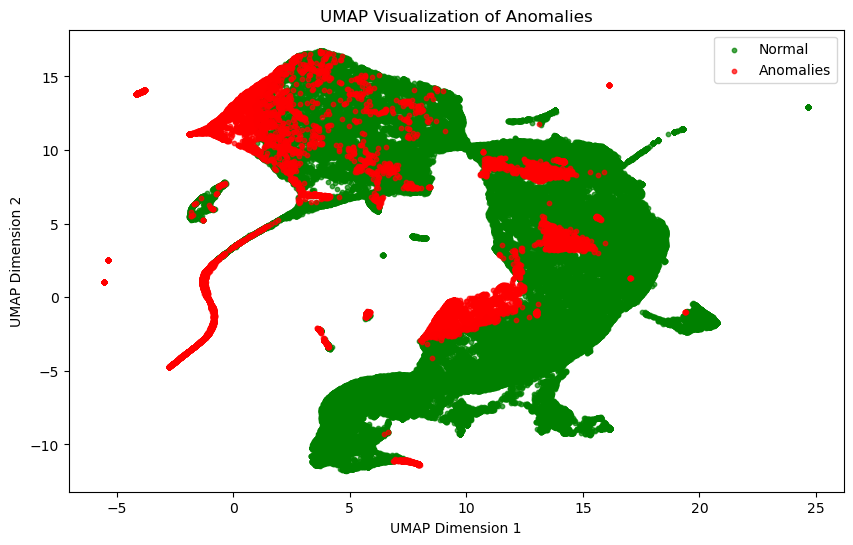

In [41]:
model = IsolationForest(random_state=42)
transformed_df['anomaly'] = model.fit_predict(transformed_df[columns_to_use])

# Convert anomaly labels to 1 for normal points and -1 for anomalies
transformed_df['anomaly'] = transformed_df['anomaly'].map({1: 1, -1: -1})

# UMAP for dimensionality reduction
umap_reducer = umap.UMAP(n_neighbors=30, min_dist=0.05, n_components=2, random_state=42)

# Apply UMAP to the selected columns
umap_embeddings = umap_reducer.fit_transform(transformed_df[columns_to_use])

# Create masks for anomalies and normal points
anomalies = transformed_df['anomaly'] == -1
normal = transformed_df['anomaly'] == 1

# Plot the UMAP results
plt.figure(figsize=(10, 6))
plt.scatter(umap_embeddings[normal, 0], umap_embeddings[normal, 1], c='green', label='Normal', s=10, alpha=0.7)
plt.scatter(umap_embeddings[anomalies, 0], umap_embeddings[anomalies, 1], c='red', label='Anomalies', s=10, alpha=0.7)
plt.title('UMAP Visualization of Anomalies')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend()
plt.show()


The UMAP visualization shows that the anomalies are mostly concentrated in a few areas